In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("Obesity_Classification.csv")

In [49]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [50]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [53]:
df[df['Weight'].notnull()].shape

(108, 7)

In [54]:
df.shape

(108, 7)

In [55]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [56]:
traducoes = {
    'ID': 'Id',
    'Age': 'Idade',
    'Gender': 'Genero',
    'Height': 'Altura',
    'Weight': 'Peso',
    'BMI': 'IMC',
    'Label': 'Classificação'
}

novas_colunas = []

for chave, valor in traducoes.items():
    novas_colunas.append(valor)

novas_colunas

['Id', 'Idade', 'Genero', 'Altura', 'Peso', 'IMC', 'Classificação']

In [57]:
df.columns = novas_colunas
df

,Id,Idade,Genero,Altura,Peso,IMC,Classificação
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [59]:
df[df['Genero'] == 'Female']
df.shape

(108, 7)

In [63]:
df[df['Idade'] > 30]

,Id,Idade,Genero,Altura,Peso,IMC,Classificação
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
...,...,...,...,...,...,...,...
99,102,42,Male,200,30,13.3,Underweight
100,103,47,Female,130,30,13.3,Underweight
101,104,52,Male,210,35,16.7,Underweight
102,105,57,Female,120,25,10.0,Underweight


In [66]:
df[(df['Classificação'] == 'Obese') & (df['Idade'] >30)]

,Id,Idade,Genero,Altura,Peso,IMC,Classificação
4,5,45,Male,190,100,31.2,Obese
6,7,55,Male,200,110,34.2,Obese
8,9,65,Male,210,120,37.2,Obese
16,17,48,Male,200,100,31.2,Obese
18,20,58,Male,210,110,34.2,Obese
24,26,88,Male,190,100,31.2,Obese
26,28,98,Male,200,110,34.2,Obese
28,30,108,Male,210,120,37.2,Obese
34,37,49,Male,200,105,28.9,Obese
36,39,59,Male,210,115,30.8,Obese


<Axes: ylabel='Frequency'>

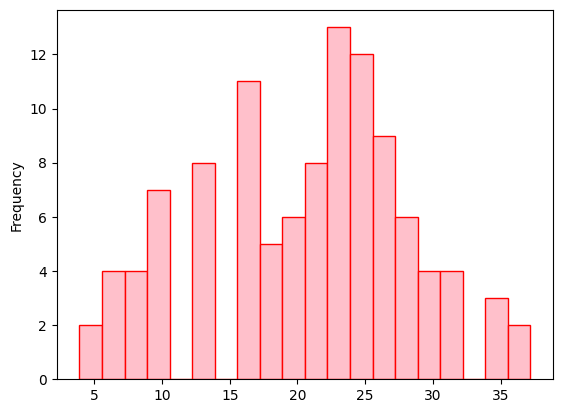

In [62]:
df['IMC'].plot.hist(bins=20, edgecolor='red', color="pink")

(108, 7)

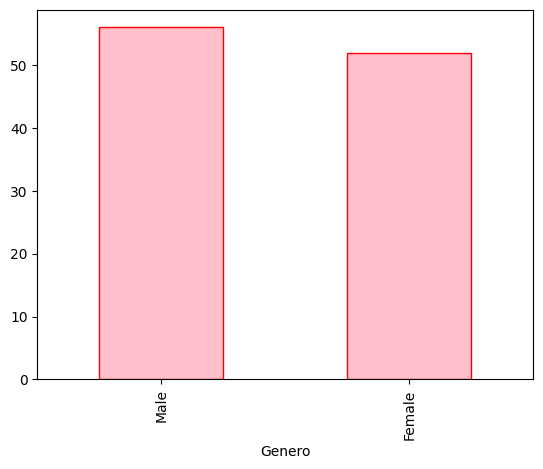

In [67]:
df['Genero'].value_counts().plot(kind='bar', edgecolor='red', color="pink");
df.shape

In [68]:
dado_agrupado = df.groupby('IMC')
dado_agrupado

In [73]:
contagem_classificacao = df['Classificação'].value_counts()
contagem_classificacao

Classificação
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64

Text(0.5, 1.0, 'Visualização das classificações')

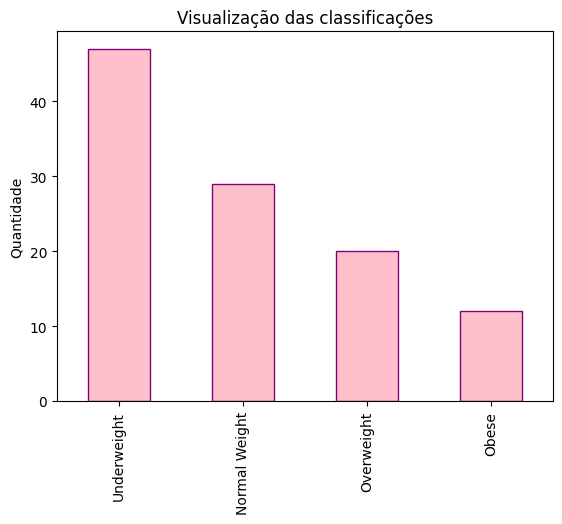

In [86]:
visu_classif= df['Classificação'].value_counts()
visu_classif.plot(kind='bar', edgecolor='purple', color="pink");

plt.xlabel('')
plt.ylabel('Quantidade')
plt.title('Visualização das classificações')


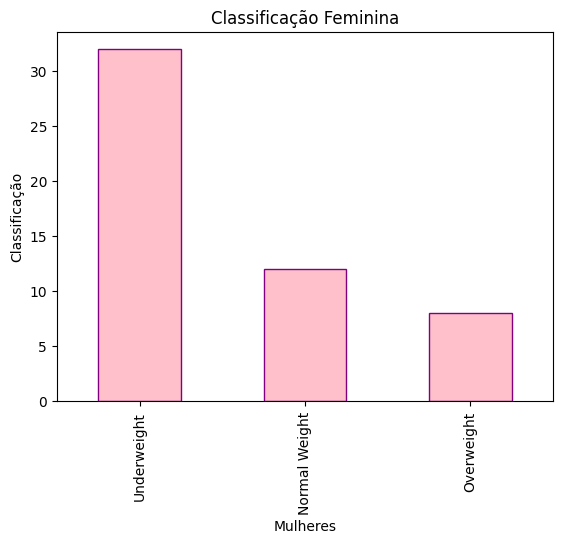

In [92]:
class_mulheres = df[df['Genero'] == 'Female']['Classificação'].value_counts()
class_mulheres.plot(kind='bar', edgecolor='purple', color="pink");

plt.xlabel('Mulheres')
plt.ylabel('Classificação')
plt.title('Classificação Feminina')
plt.show()

Text(0.5, 1.0, 'Classificação das crianças')

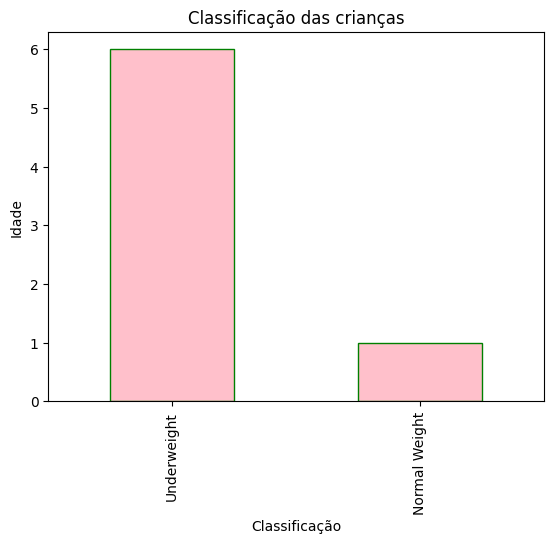

In [105]:
class_criancas = df[df['Idade'] < 17]['Classificação'].value_counts()
class_criancas.plot(kind='bar', edgecolor='green', color="pink")

plt.xlabel('Classificação')
plt.ylabel('Idade')
plt.title('Classificação das crianças')

Text(0.5, 1.0, 'Classificação dos idosos')

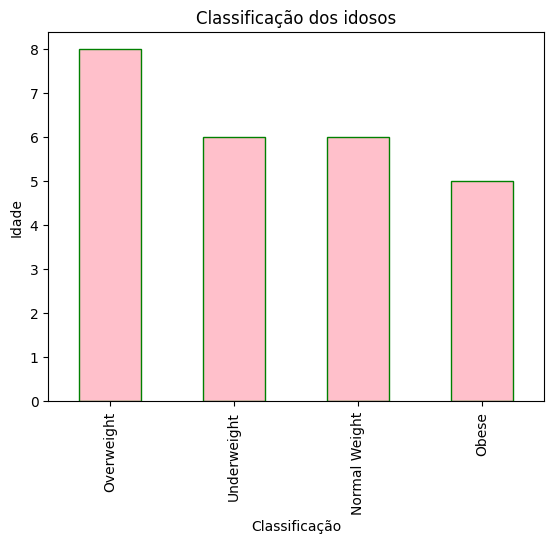

In [110]:
class_criancas = df[df['Idade'] >60]['Classificação'].value_counts()
class_criancas.plot(kind='bar', edgecolor='green', color="pink")

plt.xlabel('Classificação')
plt.ylabel('Idade')
plt.title('Classificação dos idosos')
